# Here we wanna check if the target column (SalePrice) is skewed and visualizing to know if we need a log-transform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Now, let Load Kaggle training data

In [2]:
df = pd.read_csv("../data/raw/NYC.csv")
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


# Here, we're extractin target column

In [3]:
y = df["trip_duration"] # Here is the target column
print("Number of samples:", len(y))


Number of samples: 1458644


# Now, let's Plot the raw Target (trip_duration) distribution

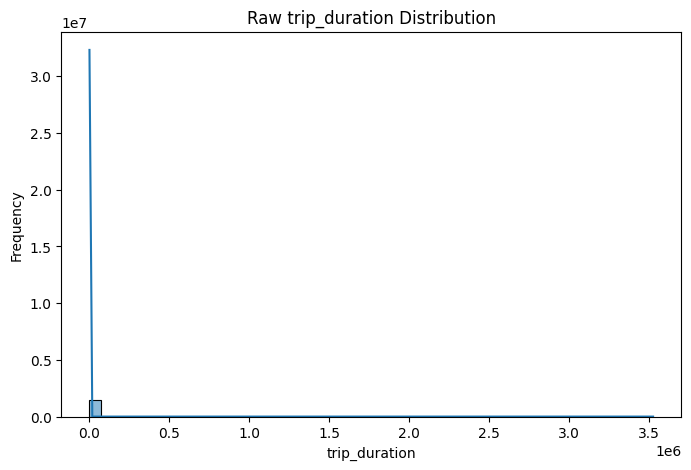

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True)
plt.title("Raw trip_duration Distribution")
plt.xlabel("trip_duration")
plt.ylabel("Frequency")
plt.show()


# let Compute skewness

## Skewness measures asymmetry of a distribution.

| Skewness value | Meaning                                |
| -------------- | -------------------------------------- |
| ~0             | symmetric (good for linear regression) |
| > 1            | highly right-skewed (problematic) , so NEED A LOG TRANSFORM     |


If extreme values (trip_duration) are:

    larger than most data → right-skew

    smaller than most data → left-skew


So in this case, we see that , it's right-skew cause we have some extreme trip_duration like, 2.0 2.5, 3.0, and around 3.5

In [5]:
print("Skewness:", skew(y))


Skewness: 343.16359069818395


# Plot log-transformed Target (trip_duration)

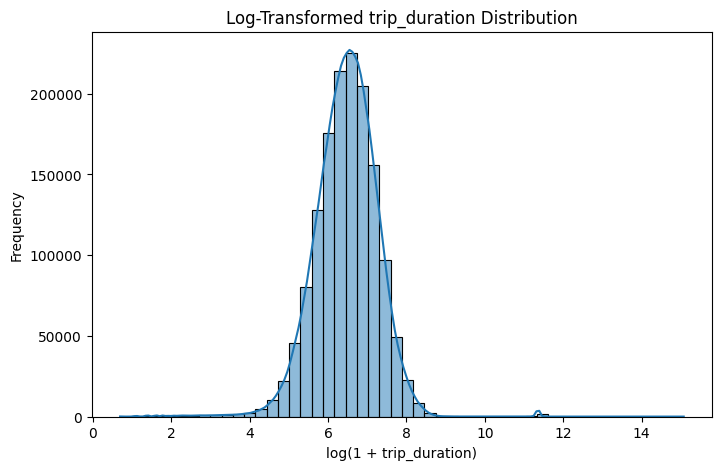

In [6]:
y_log = np.log1p(y) # Hee i'm applying the log transformation to the y

plt.figure(figsize=(8,5))
sns.histplot(y_log, bins=50, kde=True)
plt.title("Log-Transformed trip_duration Distribution")
plt.xlabel("log(1 + trip_duration)")
plt.ylabel("Frequency")
plt.show()


# Skewness after log

In [7]:
print("Skewness after log:", skew(y_log))


Skewness after log: -0.2901606253382487
